<a href="https://colab.research.google.com/github/cannedhedgehog/Saturday/blob/main/LAB_6_Nazarov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Вариант 31: g(x) = cos(4x^2 - 0.5), интервал [0, 1]
#1. Исходные данные
def g(x):
    return np.cos(4 * x**2 - 0.5)
# Диапазон
x_full = np.linspace(0, 1, 200)
y_full = g(x_full)

# Количество радиальных нейронов = количество обучающих точек
n = 9  # можно поменять, например на 7 или 11
x_train = np.linspace(0, 1, n)
y_train = g(x_train)

In [18]:
#2. Задаем параметры радиальных нейронов
# Центры нейронов (равномерно по оси X)
centers = x_train.copy()
# Ширина колокола (чем больше, тем плавнее)
sigma = (x_train[1] - x_train[0]) * 1.2

# Радиальная функция (Гауссовая)
def phi(x, c):
    return np.exp(-((x - c) ** 2) / (2 * sigma ** 2))

In [19]:
#3. Формируем матрицу F
F = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        F[i, j] = phi(x_train[i], centers[j])

In [20]:
#4. Вычисляем веса
w = np.linalg.inv(F) @ y_train


In [21]:
#5. Аппроксимация функции
def R(x):
    res = np.zeros_like(x)
    for j in range(n):
        res += w[j] * phi(x, centers[j])
    return res

y_approx = R(x_full)

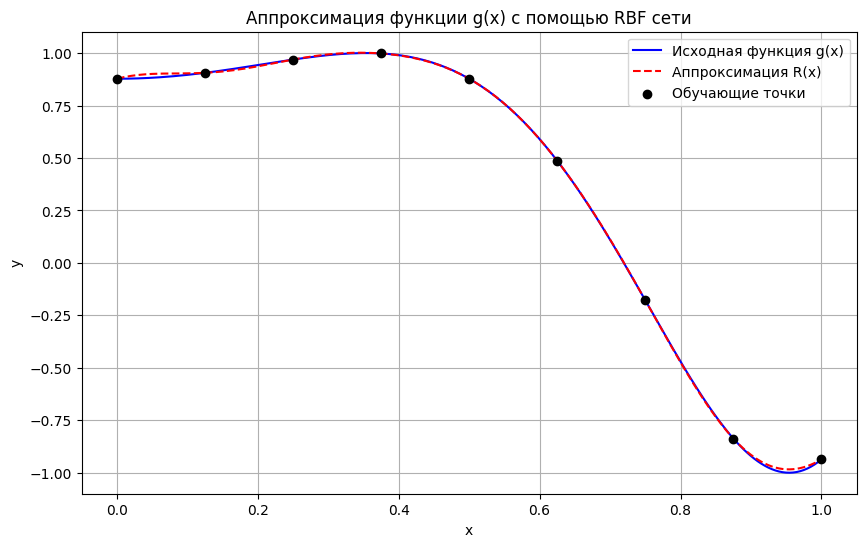

In [22]:
#6. Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x_full, y_full, 'b-', label='Исходная функция g(x)')
plt.plot(x_full, y_approx, 'r--', label='Аппроксимация R(x)')
plt.scatter(x_train, y_train, color='black', zorder=5, label='Обучающие точки')
plt.title('Аппроксимация функции g(x) с помощью RBF сети')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#7. Сохраняем все результаты в Excel
df = pd.DataFrame({
    'x_train': x_train,
    'g(x)': y_train,
    **{f'f{i+1}(x)': [phi(x_train[j], centers[i]) for j in range(n)] for i in range(n)},
})
df['Weights w'] = np.append(w, [np.nan]*(len(df)-len(w)))

excel_path = "/content/lab06_rbf_result.xlsx"
df.to_excel(excel_path, index=False)
print(f"Файл сохранён: {excel_path}")

Файл сохранён: /content/lab06_rbf_result.xlsx


In [24]:
#8. Оценка
error = np.mean((y_full - y_approx)**2)
print(f"Среднеквадратичная ошибка аппроксимации: {error:.6f}")


Среднеквадратичная ошибка аппроксимации: 0.000040
